# 계층적 군집(3) - 다른 유형의 데이터 (MNIST)

## #01. 패키지 설치

In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_digits

## #02. 데이터 불러오기

### 전체 데이터셋 로딩

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

### 무작위 50개 추출

#### 추출할 이미지 수, 랜덤시드 고정

In [3]:
rnd_count = 50
np.random.seed(777)

#### 무작위 50개에 대한 인덱스 생성

In [4]:
idx = np.random.choice(range(len(digits.data)), rnd_count)
idx

array([ 103,  815, 1595,  934, 1623,   71, 1693,  639,  116, 1447,  985,
        814, 1530,  792, 1319,  397,  654,   32,  321,  850,  340, 1349,
        577, 1567, 1211, 1127, 1098,  850, 1586, 1342,  967,  365,  836,
        824, 1350,  322,  202,   60,  967,  888, 1664,  819,  186,  642,
       1040,  355,  237, 1651,  171,  384])

#### 무작위 인덱스에 대한 표본 추출

In [6]:
x = digits.data[idx]
x.shape

(50, 64)

In [7]:
images = digits.images[idx]
images.shape

(50, 8, 8)

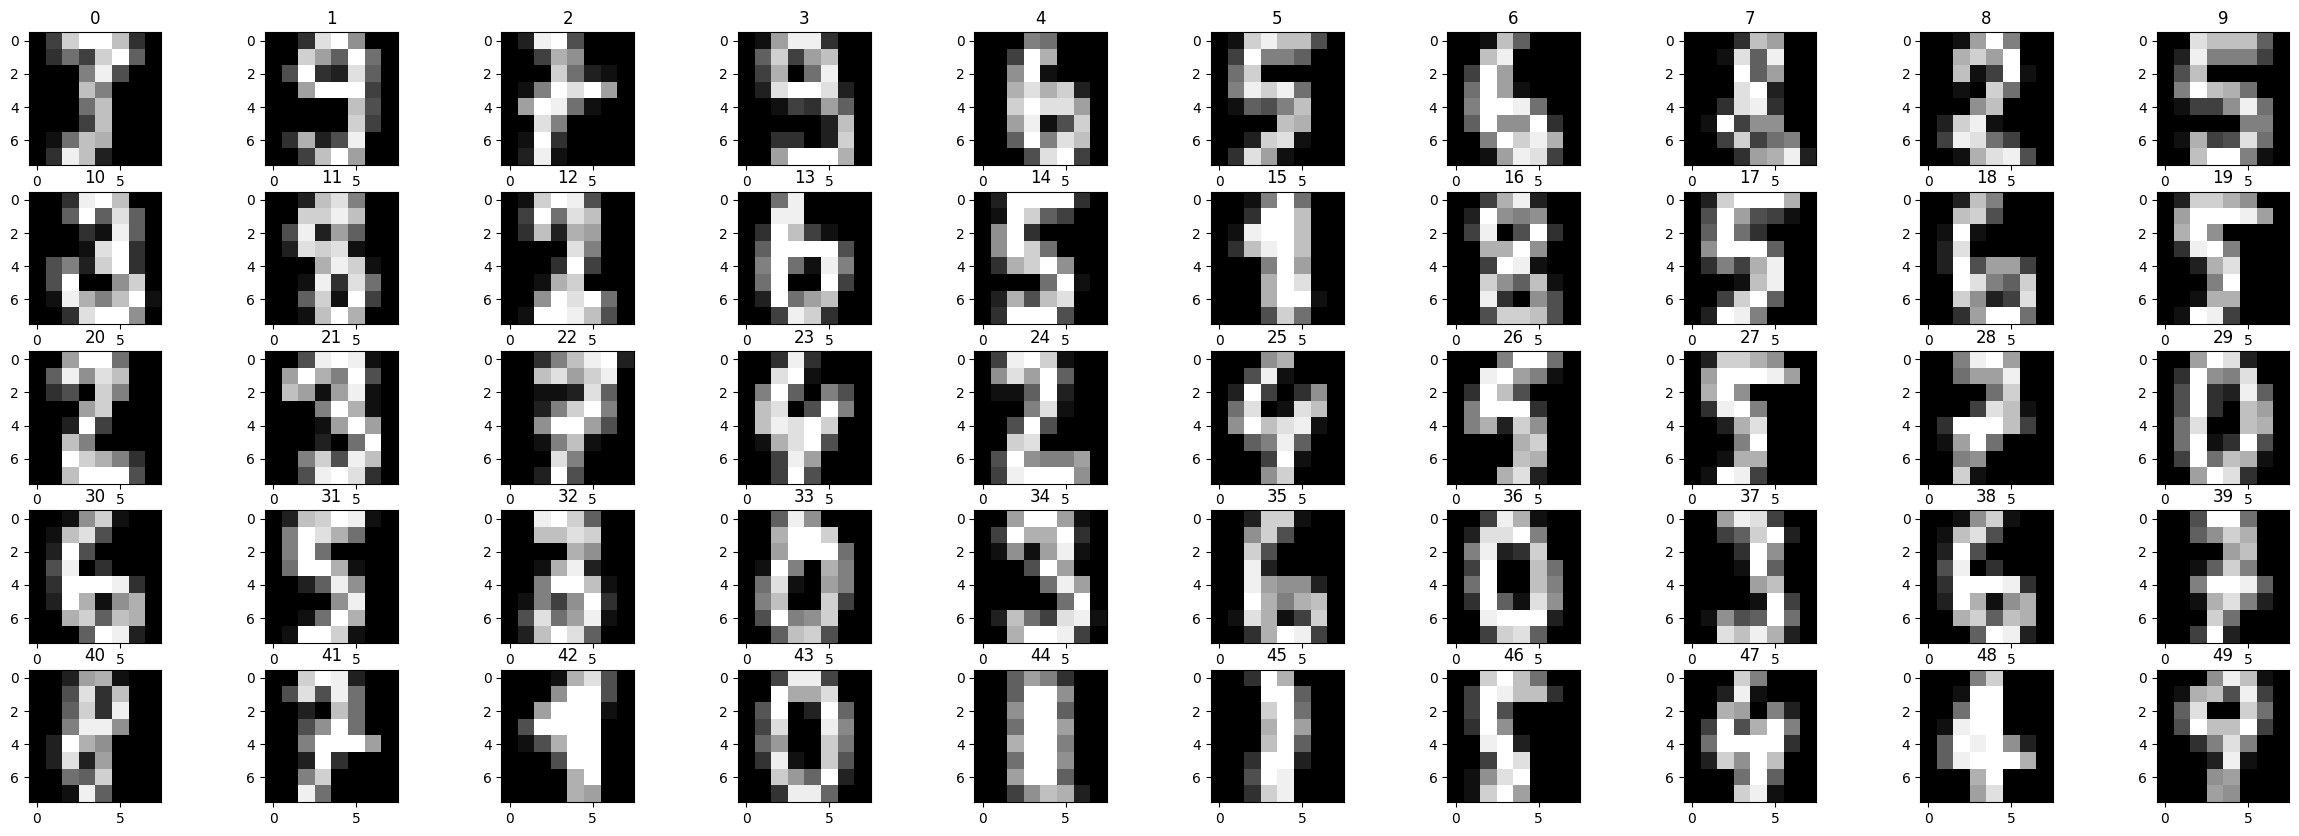

In [8]:
fig, ax = plt.subplots(5, 10, figsize=(30,10))

idx = 0
for i in range(0,5):
    for j in range(0,10):
        ax[i][j].imshow(images[idx], cmap='gray')
        ax[i][j].set_title(str(idx))
        idx += 1

## #03. 군집 수행

In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

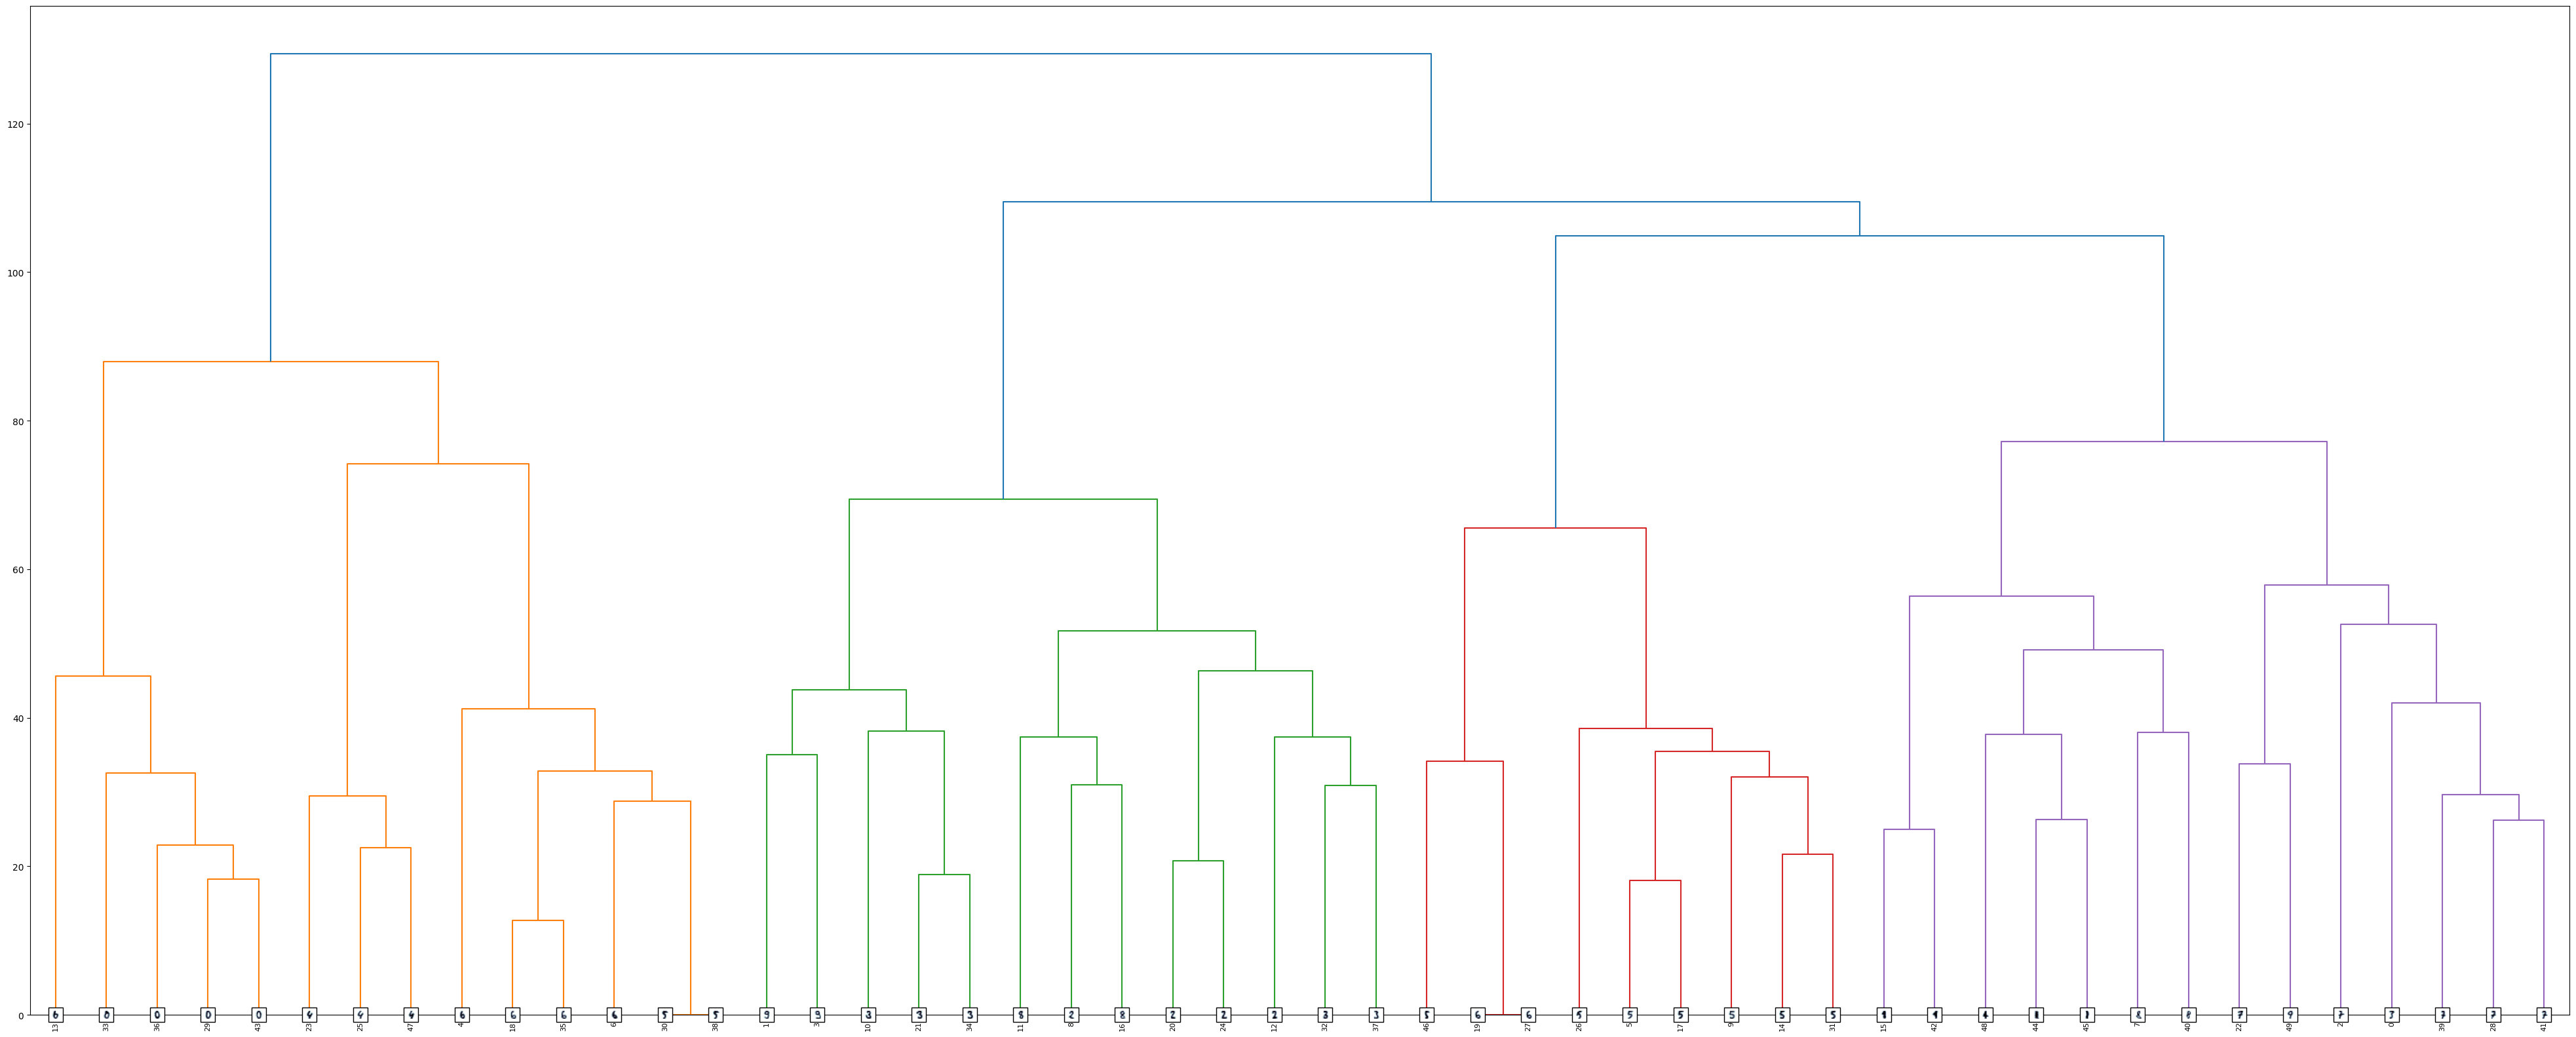

In [11]:
lnk = linkage(x,'ward')

fig, ax = plt.subplots(1,1,figsize=(50,20))

r = dendrogram(lnk)

dcoord = np.array(r['dcoord'])
icoord = np.array(r['icoord'])
leaves = np.array(r['leaves'])
idx = np.argsort(dcoord[:,2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(lnk[:,:2].ravel())
label_pos = icoord[:,1:3].ravel()[idx][:rnd_count]

for i in range(rnd_count):
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation='bilinear', )

for i in range(rnd_count):
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation="bilinear", zorder = 5)
    ab = AnnotationBbox(imagebox, (label_pos[i], 0))
    ax.add_artist(ab)

plt.show()

### 색상이름 목록

`k` 번째 항목은 `k` 번째 링크의 색상

In [12]:
print(r['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C0', 'C0', 'C0']


In [13]:
print(r['icoord'])

[[35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [15.0, 15.0, 32.5, 32.5], [5.0, 5.0, 23.75, 23.75], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [95.0, 95.0, 105.0, 105.0], [125.0, 125.0, 135.0, 135.0], [115.0, 115.0, 130.0, 130.0], [100.0, 100.0, 122.5, 122.5], [85.0, 85.0, 111.25, 111.25], [62.5, 62.5, 98.125, 98.125], [14.375, 14.375, 80.3125, 80.3125], [145.0, 145.0, 155.0, 155.0], [175.0, 175.0, 185.0, 185.0], [165.0, 165.0, 180.0, 180.0], [150.0, 150.0, 172.5, 172.5], [205.0, 205.0, 215.0, 215.0], [195.0, 195.0, 210.0, 210.0], [225.0, 225.0, 235.0, 235.0], [255.0, 255.0, 265.0, 265.0], [245.0, 245.0, 260.0, 260.0], [230.0, 230.0, 252.5, 252.5], [202.5, 202.5, 241.25, 241.25], [161.25, 161.25, 221.875, 221.875], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [315.0, 315.0, 325.0, 325.0], [345.0, 345.0, 355.0, 355.0], [335.0, 335.0, 350.0, 350.0], [320.0, 320.0, 342.5, 342.5], [305.0, 305.0, 331.25, 331.25], [282.5, 282.5, 318.125, 318.125], [365.0, 365.0, 

In [14]:
print(r['dcoord'])

[[0.0, 18.303005217723125, 18.303005217723125, 0.0], [0.0, 22.854612955229264, 22.854612955229264, 18.303005217723125], [0.0, 32.56020065458238, 32.56020065458238, 22.854612955229264], [0.0, 45.5993421005172, 45.5993421005172, 32.56020065458238], [0.0, 22.494443758403985, 22.494443758403985, 0.0], [0.0, 29.45052348148218, 29.45052348148218, 22.494443758403985], [0.0, 12.68857754044952, 12.68857754044952, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 28.728615235220325, 28.728615235220325, 0.0], [12.68857754044952, 32.85219424432205, 32.85219424432205, 28.728615235220325], [0.0, 41.21164883864755, 41.21164883864755, 32.85219424432205], [29.45052348148218, 74.16198487095662, 74.16198487095662, 41.21164883864755], [45.5993421005172, 87.91884786280933, 87.91884786280933, 74.16198487095662], [0.0, 35.04283093587046, 35.04283093587046, 0.0], [0.0, 18.841443681416774, 18.841443681416774, 0.0], [0.0, 38.22302970723278, 38.22302970723278, 18.841443681416774], [35.04283093587046, 43.74471396637541, 43.74471

In [15]:
print(r['leaves'])

[13, 33, 36, 29, 43, 23, 25, 47, 4, 18, 35, 6, 30, 38, 1, 3, 10, 21, 34, 11, 8, 16, 20, 24, 12, 32, 37, 46, 19, 27, 26, 5, 17, 9, 14, 31, 15, 42, 48, 44, 45, 7, 40, 22, 49, 2, 0, 39, 28, 41]
